# 实验4 人脸面部识别

## 简介

**人脸面部识别技术**

基于人的脸部特征信息进行身份识别的一种生物识别技术。用摄像机或摄像头采集含有人脸的图像或视频流，并自动在图像中检测和跟踪人脸，进而对检测到的人脸进行脸部识别的一系列相关技术，通常也叫做人像识别、面部识别。

下面的实验内容是简单识别出图像中人物的面部，进而为以后更深层次的学习打下基础。

## 实验要求

1. 介绍人脸识别技术的基本实现原理；
2. 人脸识别程序流程图设计；
3. 根据提供的图像或自己选用图像，编写程序，能够识别出图像中人物的脸部；

识别时用的人脸特征：
- “三庭五眼”规则高度
- 宽度比例应该在（ 0.6, 2）内
- 眼部特征

------

人脸识别技术基本上包括以下步骤：

a. 数据收集： 收集包含正面人脸的图像数据集。

b. 预处理： 对图像进行预处理，包括灰度化、直方图均衡化等操作，以便提高后续的处理效果。

c. 人脸检测： 使用人脸检测算法找到图像中的人脸位置。常用的方法包括Haar级联分类器、人脸关键点检测等。

d. 特征提取： 提取人脸图像的特征，例如使用主成分分析（PCA）、局部二值模式（LBP）等方法。

e. 特征匹配： 将提取到的人脸特征与数据库中的已知特征进行匹配，找到最相似的人脸。

f. 判定与识别： 判断是否识别成功，如果有多个匹配，则可能需要使用进一步的方法进行决策。

------

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

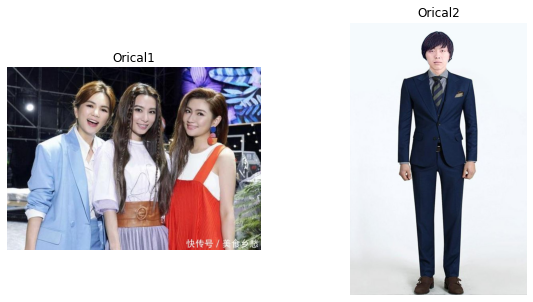

In [2]:
img1 = cv2.imread("imgs/Lab7/Orical1.jpg")
img2 = cv2.imread("imgs/Lab7/Orical2.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis("off")
plt.title("Orical1")
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis("off")
plt.title("Orical2")
plt.show()

In [3]:
# 识别人肤色的区域
# HSV颜色空间
hsv1 = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
hsv2 = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
# 人肤色的HSV范围
lower_skin = np.array([0, 48, 80])
upper_skin = np.array([20, 64, 255])
# 识别人肤色的区域
mask1 = cv2.inRange(hsv1, lower_skin, upper_skin)
mask2 = cv2.inRange(hsv2, lower_skin, upper_skin)
# 人肤色区域的图像
img_skin1 = cv2.bitwise_and(img1, img1, mask=mask1)
img_skin2 = cv2.bitwise_and(img2, img2, mask=mask2)

In [4]:
# 遍历肤色图中的每个像素点，将非肤色区域的像素点置为黑色，肤色区域的像素点置为白色
# 二值化
img_skin1 = cv2.cvtColor(img_skin1, cv2.COLOR_RGB2GRAY)
img_skin2 = cv2.cvtColor(img_skin2, cv2.COLOR_RGB2GRAY)
# 二值化
ret, img_skin1 = cv2.threshold(img_skin1, 0, 255, cv2.THRESH_BINARY)
ret, img_skin2 = cv2.threshold(img_skin2, 0, 255, cv2.THRESH_BINARY)

# 闭运算
kernel = np.ones((5, 5), np.uint8)
img_skin1 = cv2.morphologyEx(img_skin1, cv2.MORPH_CLOSE, kernel)
img_skin2 = cv2.morphologyEx(img_skin2, cv2.MORPH_CLOSE, kernel)

# Apply dilation
kernel = np.ones((5, 5), np.uint8)
img_skin1 = cv2.dilate(img_skin1, kernel, iterations=1)
img_skin2 = cv2.dilate(img_skin2, kernel, iterations=1)

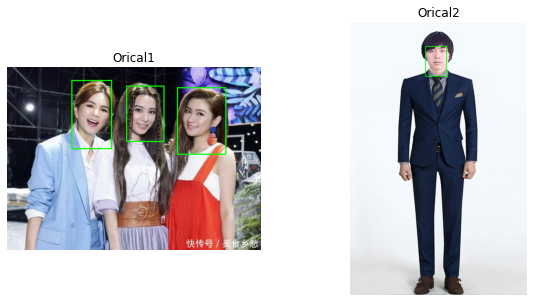

In [5]:
# 找出img_skin中白色像素多的矩形区域
def find_max_rect(img_skin, top_n=1):
    # 找出img_skin中白色像素多的矩形区域
    contours, hierarchy = cv2.findContours(img_skin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # 找出所有矩形区域的白色像素数量
    areas = [cv2.contourArea(contour) for contour in contours]
    # 找出top_n个白色像素最多的矩形区域的索引
    top_indices = sorted(range(len(areas)), key=lambda i: areas[i], reverse=True)[:top_n]
    # 找出top_n个矩形区域的外接矩形
    top_rects = [cv2.boundingRect(contours[i]) for i in top_indices]
    return top_rects


img_rect1 = find_max_rect(img_skin1, top_n=3)
img_rect2 = find_max_rect(img_skin2)

# Draw the bounding rectangles
img1_rect = img1.copy()
for x, y, w, h in img_rect1:
    cv2.rectangle(img1_rect, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1_rect)
plt.axis("off")
plt.title("Orical1")
img2_rect = img2.copy()
for x, y, w, h in img_rect2:
    cv2.rectangle(img2_rect, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.subplot(1, 2, 2)
plt.imshow(img2_rect)
plt.axis("off")
plt.title("Orical2")
plt.show()